# Question 1: Solving Linear Systems
## Part a)
Modify SolveLinear.py module (provided by instructor) to include a function called PartialPivot that performs Gaussian elimination with along with partial pivot to prevent division by zero errors if the first entry or subsequent diagonal entries are 0. Nothing to submit, but we will use this module, including this PartialPivot function throughout this question.
Below we check that our partial pivot function yields the same answer as GaussElim does for the system in Newman 6.16.

In [73]:
#will use this pre-defined
#fig size and font size for figures 
#because it is the largest I can go
#and still have it render in pdf nicely
plotsize = (7,7) 
font = 12
#Q1 part a)
#import SolveLinear module functions
from SolveLinear import GaussElim, PartialPivot
import numpy as np #import numpy for arrays 
#instantiate arrray variable A as the 4x4 matrix in 6.16
A = np.array\
([2.,1.,4.,1.,3.,4.,-1.,-1.,1.,-4.,1.,5.,2.,-2.,1.,3.]).reshape(4,4) 
#instantiate vector variable v as the vector in 6.16 (Ax = v)
v = np.array([-4.,3.,9.,7.])

x1 = GaussElim(A,v) #solve for x using gaussian elimination
x2 = PartialPivot(A,v) #solve for x using the partial pivot function
#check the solutions are the same up to rounding and print
print('It is '+str(np.allclose(np.dot(A, x2), v))\
      +' that PartialPivot yields the correct solution')

It is True that PartialPivot yields the correct solution


## Part b)
Let's now test the accuracy and timing of 3 different methods that are mathematically equivalent for solving linear systems. Despite being mathematically equivalent, these methods have different computational implications in practice. The methods are LU decomposition, Gaussian elimination, and partial pivot, each with back substitution. 

To implement LU we will use numpy.linalg.solve which performs LU decomposition and backsubstitution. Gaussian elimination and partial pivot will be performed using SolveLinear.GaussElim and SolveLinear.PartialPivot, respectively. 

For timing, the built in function time.time() will be used to record start and finish times of operations and the difference will be taken as the benchmark for time. Note that this is a relatively crude method of computational timing and sometimes yields zero for very fast operations. The  

Since we are solving a system as $Ax = v$ we know the 'true' solution $v_{true} = v$, and we will can therefore evaluate the error, $\epsilon$ as follows:
\begin{equation}
    \epsilon = \mathrm{mean}(\mathrm{abs}(v_{true} - \mathrm{dot}(A, x_{solution})))
\end{equation}
where $\mathrm{mean, abs, dot}$ denote functions to perform calculation of mean, absolute value, and dot product, respectively which can be implemented using built in functions from python base and numpy, $v_{true}$ is expected result of $\mathrm{dot}(A,x)$ as descibed above, and $x_{solution}$ is the output vector from one of the linear system solver methods being evalulated. 

In [57]:
#Q1 part b)
#will use random.randint to fill
#NxN matrices with pseudo-random entries
from random import randint 
#solve function uses LU decomposition with backsubstitution
from numpy.linalg import solve
#time.time() will be used for timing
from time import time
#an array of values N which will define matrix size
Ns = np.arange(5,300,3) #5 to 399, every 3rd value
#empty arrays to take timing measurements
time_LU = np.empty(len(Ns))
time_Gauss = np.empty(len(Ns))
time_Pivot = np.empty(len(Ns))
#empty arrays to take error values
err_LU = np.empty(len(Ns))
err_Gauss = np.empty(len(Ns))
err_Pivot = np.empty(len(Ns))
#instantiating floating variables
#that will temporarily store computed
#solution vectors throughout loop
x_LU = 0.0
x_Gauss = 0.0
x_Pivot = 0.0
#loop over matrix sizes
for k in range(len(Ns)): # for each of these values
    N = Ns[k] #matrix size for kth iteration
    #lets generate random square matrices and N-length vectors
    v = np.empty(N) #vector preallocation
    #matrix preallocation. will later reformat to NxN
    A = np.empty(N**2)
    #a loop over N*2 to fill matrix
    for i in range(N**2): 
        if i<N: #only need N values to fill vector
            #chose range to not include 0 so Gauss elim wouldnt potentially fail
            r1 = randint(1,100) #generate pseudo-random int
            v[i] = r1 #fill enty of v
        r2 = randint(1,100) #generate pseudo-random int
        A[i] = r2 #fill entry of A
    A = A.reshape(N,N) #reshape N^2-length vector into NxN matrix
    #Now, lets solve using LU, GaussElim, PartialPivot
    #LU
    t1 = time() #start time
    x_LU = solve(A,v) #perform solve computation
    t2 = time() #end time
    time_LU[k] = t2-t1 #get time elapsed
    #calculate v_{solution} for LU
    v_LU = np.dot(A,x_LU) 
    err_LU[k] = np.mean(abs(v-v_LU)) #compute error
    #Gaussian elimination
    t1 = time() #start time
    x_Gauss = GaussElim(A,v) #perform solve computation
    t2 = time() #end time
    time_Gauss[k] = t2-t1 #get time elapsed
    #calculate v_{solution} for GaussElim
    v_Gauss = np.dot(A,x_Gauss)  #perform solve computation
    err_Gauss[k] = np.mean(abs(v-v_Gauss)) #compute error
    #Partial Pivot
    t1 = time() #start time
    x_Pivot = PartialPivot(A,v) #perform solve computation
    t2 = time() #end time
    time_Pivot[k] = t2-t1 #get time elapsed
    #calculate v_{solution} for GaussElim
    v_Pivot = np.dot(A,x_Pivot) 
    err_Pivot[k] = np.mean(abs(v-v_Pivot)) #compute error


In [58]:
#REMOVE ANY ZERO TIMES BEFORE PLOTTING IN LOG
#indices where LU time is non-zero
inds_LU = np.where(time_LU != 0)
#nonzeros LU time values
time_LU_nozero = time_LU[inds_LU]
#the corresponding N values
Ns_LU_nozero = Ns[inds_LU]
#indices where GaussElim time is non-zero
inds_Gauss = np.where(time_Gauss != 0)
#nonzeros GaussElim time values
time_Gauss_nozero = time_Gauss[inds_Gauss]
#the corresponding N values
Ns_Gauss_nozero = Ns[inds_Gauss]
#indices where PartialPivot time is non-zero
inds_Pivot = np.where(time_Pivot != 0)
#nonzeros LU time values
time_Pivot_nozero = time_Pivot[inds_Pivot]
#the corresponding N values
Ns_Pivot_nozero = Ns[inds_Pivot]

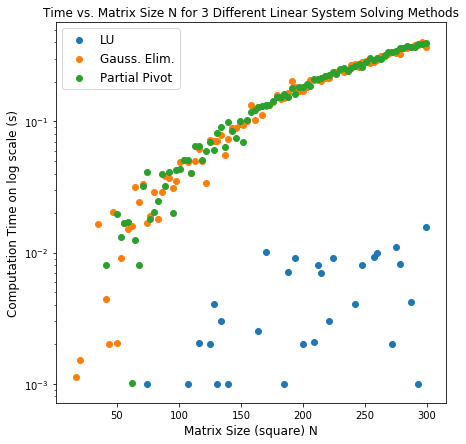

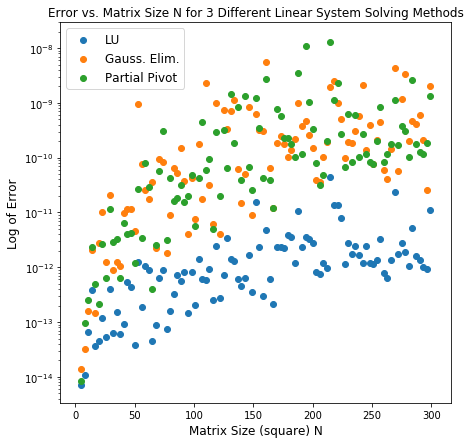

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize = plotsize)
plt.yscale('log')
plt.title('Time vs. Matrix Size N for 3 Different Linear System Solving Methods',\
         fontsize = font)
plt.ylabel('Computation Time on log scale (s)', fontsize = font)
plt.xlabel('Matrix Size (square) N', fontsize=font)
plt.scatter(Ns_LU_nozero, time_LU_nozero, label = 'LU')
plt.scatter(Ns_Gauss_nozero, time_Gauss_nozero, label = 'Gauss. Elim.')
plt.scatter(Ns_Pivot_nozero, time_Pivot_nozero, label = 'Partial Pivot')
plt.legend(fontsize = font)

plt.figure(figsize = plotsize)
plt.title('Error vs. Matrix Size N for 3 Different Linear System Solving Methods',\
         fontsize = font)
plt.xlabel('Matrix Size (square) N',fontsize = font)
plt.ylabel('Log of Error',fontsize = font)
plt.yscale('log')
plt.scatter(Ns, err_LU, label = 'LU')
plt.scatter(Ns, err_Gauss, label = 'Gauss. Elim.')
plt.scatter(Ns, err_Pivot, label = 'Partial Pivot')
plt.legend(fontsize = font)

One can observe in the above plots that Gaussian elimination and partial pivot methods take approximately the same computation time for the range of matrix sizes sampled (5 to 299, every 3rd number) and produce approximately the same order of accuracy. It is also clear that applying LU decomposition method using numpy.linalg.solve is both computationally faster that these other two methods, but also more accurate. Please take note that the above plots are plotted with a log scale on the y axis to account for the large differences in values for the different methods so they could all fit on one figure. 

## Part c)
In this question we use SolveLinear.PartialPivot to solve the linear system describing the RC circuit in Excercise 6.5 in Newmann (also in the Physics Background section of the lab manual). In addition, we solve the system updated with the addition of a magnetic inductance in place of a resistor (now an RLC circuit) with partial pivot method. The linear system for the RC circuit as printed in Newman/ the lab manual can be expressed as a matrix equation as follows: 
$$
\begin{bmatrix}
    \big( \frac{1}{R_1} + \frac{1}{R_4} + i\omega C_1 \big) & -i\omega C1 & 0 \\
    -\omega C_1 & \big( \frac{1}{R_2} + \frac{1}{R_5} + i\omega C_1 + i\omega C_1 \big) & -i\omega C_2 \\
    0 & -\omega C_2 & \big( \frac{1}{R_3} + \frac{1}{R_6} + i\omega C_2 \big)
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
=
\begin{bmatrix}
    \frac{x_{+}}{R_1} \\
    \frac{x_{+}}{R_2} \\
    \frac{x_{+}}{R_3}
\end{bmatrix}
$$
And the RLC circuit can be written as follows ($L = \frac{R_6}{\omega},\quad R_6 \rightarrow i\omega L \implies \quad R_6 \rightarrow iR_6$):
$$
\begin{bmatrix}
    \big( \frac{1}{R_1} + \frac{1}{R_4} + i\omega C_1 \big) & -i\omega C1 & 0 \\
    -\omega C_1 & \big( \frac{1}{R_2} + \frac{1}{R_5} + i\omega C_1 + i\omega C_1 \big) & -i\omega C_2 \\
    0 & -\omega C_2 & \big( \frac{1}{R_3} + \frac{1}{iR_6} + i\omega C_2 \big)
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3
\end{bmatrix}
=
\begin{bmatrix}
    \frac{x_{+}}{R_1} \\
    \frac{x_{+}}{R_2} \\
    \frac{x_{+}}{R_3}
\end{bmatrix}
$$

For this problem we will use the following values for the constants:
$$
R_1 = R_3 = R_5 = 1 \ k\Omega \\
R_2 = R_4 = R_6 = 2 \ k\Omega \\
C_1 = 1 \ \mu F, \ C_2 = 0.5 \ \mu F \\
x_{+} = 3V \\
\omega = 1000 \ rad s^{-1} \\
$$

After solving these systems, we can solve for $V_1, \ V_2, \ V_3$ as follows:
$$
V_1 = x_1\mathrm{e}^{i\omega t}\\
V_2 = x_2\mathrm{e}^{i\omega t}\\
V_3 = x_3\mathrm{e}^{i\omega t}
$$
and calculate their modulus $|V_i|,\ i=1,2,3$.

We also want to plot the real part of these voltages for a few periods ($T = \frac{2\pi}{\omega}$). We will use the Euler Identity $e^{i\theta} = \mathrm{cos}(\theta) + i\mathrm{sin}(\theta)$ to find the real component. Note $x_1, x_2, x_3 \in \mathbb{C}$ so we can write each of the $x_i\mathrm{'s}$ as $x_i = a + ib$ for some $a, b \in \mathbb{R}$. So:
$$V_i = (a + ib)(\mathrm{cos}(\omega t) + i\mathrm{sin}(\omega t)) = ...\mathrm{algebra}... = x\mathrm{cos}(\omega t) - y\mathrm{sin}(\omega t) + i(x\mathrm{sin}(\omega t) + y\mathrm{cos}(\omega t)) \\ \implies \mathrm{Re}(V_i) = x\mathrm{cos}(\omega t) - y\mathrm{sin}(\omega t)$$

NB: subscipt $i$ is an index, $i$ used algebraically is the imaginary number $\sqrt{-1}$.

In [67]:
#Q1 part c)
#define constants
R1 = 1 #kOhm
R3 = 1 #kOhm
R5 = 1 #kOhm
R2 = 2 #kOhm
R4 = 2 #kOhm
R6 = 2 #kOhm
C1 = 1 #micro F
C2 = 0.5 #micro F
xplus = 3 #V
w = 1000 #rad s^-1
#define system Mx = y

M = np.array(\
[[((1/R1) + (1/R4)+1j*w*C1),1j*w*C1,0],\
 [-1j*w*C1,((1/R2) + (1/R5) + 1j*w*C1 + \
1j*w*C2),-1j*w*C2],[0, -1j*w*C2, \
((1/R3) + (1/R6) + 1j*w*C2)]],dtype=np.complex_)

y = np.array([(xplus/R1), (xplus/R2), (xplus/R3)],dtype=np.complex_)
#TO DO covert units?

In [68]:
#solve for x
x = PartialPivot(M,y) 

In [69]:
# at t=0 V1, V2, V3 are...
V1 = x[0]
V2 = x[1]
V3 = x[2]
#magnitudes
modulo_V1 = abs(V1)
modulo_V2 = abs(V2)
modulo_V3 = abs(V3)
#phases
phase_V1 = np.angle(V1)
phase_V2 = np.angle(V2)
phase_V3 = np.angle(V3)

print('For RC circuit...')

print('|V1| = {0}'.format(modulo_V1))
print('|V2| = {0}'.format(modulo_V2))
print('|V3| = {0}'.format(modulo_V3))

print('phase of V1 = {0}'.format(phase_V1))
print('phase of V2 = {0}'.format(phase_V2))
print('phase of V3 = {0}'.format(phase_V3))


For RC circuit...
|V1| = 0.0007500318504648686
|V2| = 0.003749983926736617
|V3| = 0.00974993254934607
phase of V1 = 1.5850459866422504
phase of V2 = -1.5682463388356545
phase of V3 = -1.5668155739330156


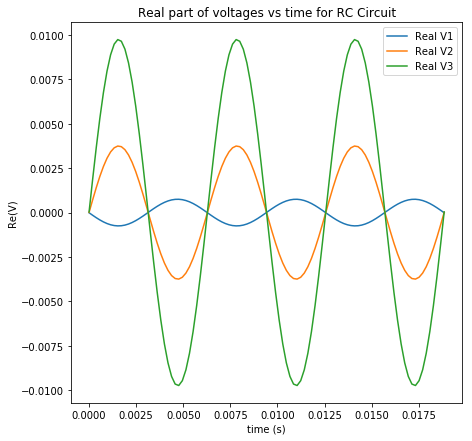

In [81]:
#plot voltages with their time-evolving phases for several periods
#for RC circuit
T = 2*np.pi/w #1 period in s
t = np.linspace(0,3*T,100) #time for 3 periods
#get real components of voltage according to derived
#expression in introduction
V1_real = V1.real*np.cos(w*t) - V1.imag*np.sin(w*t)
V2_real = V2.real*np.cos(w*t) - V2.imag*np.sin(w*t)
V3_real = V3.real*np.cos(w*t) - V3.imag*np.sin(w*t) 

plt.figure(figsize = plotsize)
plt.plot(t,V1_real,label = 'Real V1')
plt.plot(t,V2_real,label = 'Real V2')
plt.plot(t,V3_real,label = 'Real V3')
plt.title('Real part of voltages vs time for RC Circuit')
plt.ylabel('Re(V)')
plt.xlabel('time (s)')
plt.legend()


In [64]:
Mp = np.array([[((1/R1) + (1/R4)+1j*w*C1),1j*w*C1,0],[-1j*w*C1,((1/R2) + (1/R5) + 1j*w*C1 + 1j*w*C2),-1j*w*C2],[0, -1j*w*C2, ((1/R3) + (1/(1j*R6)) + 1j*w*C2)]],dtype=np.complex_)
#solve (Mp)(xp) = y
xp = PartialPivot(Mp,y) 


In [80]:
# at t=0 V1, V2, V3 are...
V1p = xp[0]
V2p = xp[1]
V3p = xp[2]
#magnitudes
modulo_V1p = abs(V1p)
modulo_V2p = abs(V2p)
modulo_V3p = abs(V3p)
#phases
phase_V1p = np.angle(V1p)
phase_V2p = np.angle(V2p)
phase_V3p = np.angle(V3p)

print('For RLC circuit...')

print('|V1| = {0}'.format(modulo_V1p))
print('|V2| = {0}'.format(modulo_V2p))
print('|V3| = {0}'.format(modulo_V3p))

print('phase of V1 = {0}'.format(phase_V1p))
print('phase of V2 = {0}'.format(phase_V2p))
print('phase of V3 = {0}'.format(phase_V3p))

For RLC circuit...
|V1| = 0.0007524610444100013
|V2| = 0.0037524348249052602
|V3| = 0.009762173277757427
phase of V1 = 1.5817823302241283
phase of V2 = -1.5688941607312712
phase of V3 = -1.5680624329512014


"\nplt.figure(figsize = plotsize)\n#plt.plot(t,modulo_V1*np.cos(w*t),label = 'Real V1')\nplt.plot(t,V1_real,label = 'Real V1')\nplt.plot(t,V2_real,label = 'Real V2')\nplt.plot(t,V3_real,label = 'Real V3')\nplt.title('Real part of voltages vs time for RC Circuit')\nplt.ylabel('Voltage Amplitude (V)')\nplt.xlabel('time (s)')\nplt.legend()\n"

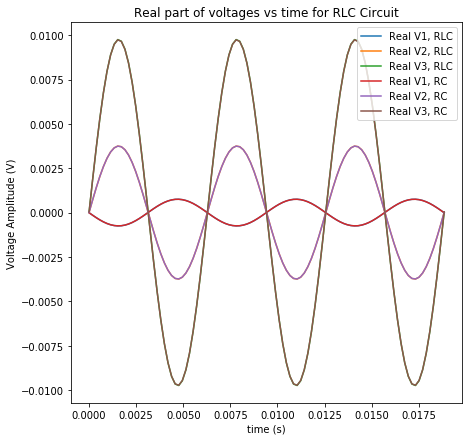

In [93]:
#plot voltages with their time-evolving phases for several periods
#for RLC circuit
#get real components of voltage according to derived
#expression in introduction
V1p_real = V1p.real*np.cos(w*t) - V1p.imag*np.sin(w*t)
V2p_real = V2p.real*np.cos(w*t) - V2p.imag*np.sin(w*t)
V3p_real = V3p.real*np.cos(w*t) - V3p.imag*np.sin(w*t) 

plt.figure(figsize = plotsize)
plt.plot(t,V1p_real,label = 'Real V1, RLC')
plt.plot(t,V2p_real,label = 'Real V2, RLC')
plt.plot(t,V3p_real,label = 'Real V3, RLC')
plt.plot(t,V1_real,label = 'Real V1, RC')
plt.plot(t,V2_real,label = 'Real V2, RC')
plt.plot(t,V3_real,label = 'Real V3, RC')
plt.title('Real part of voltages vs time for RLC Circuit')
plt.ylabel('Voltage Amplitude (V)')
plt.xlabel('time (s)')
plt.legend()
'''
plt.figure(figsize = plotsize)
#plt.plot(t,modulo_V1*np.cos(w*t),label = 'Real V1')
plt.plot(t,V1_real,label = 'Real V1')
plt.plot(t,V2_real,label = 'Real V2')
plt.plot(t,V3_real,label = 'Real V3')
plt.title('Real part of voltages vs time for RC Circuit')
plt.ylabel('Voltage Amplitude (V)')
plt.xlabel('time (s)')
plt.legend()
'''


They look identical...? And there modulus and phase is the same? But their imaginary and real components aren't?

In [91]:
V1p_real

array([-8.26637333e-06, -1.50512585e-04, -2.87318879e-04, -4.13740721e-04,
       -5.25208895e-04, -6.17694651e-04, -6.87855313e-04, -7.33155091e-04,
       -7.51956735e-04, -7.43580703e-04, -7.08329727e-04, -6.47477869e-04,
       -5.63224474e-04, -4.58614679e-04, -3.37429354e-04, -2.04048454e-04,
       -6.32927108e-05,  7.97505959e-05,  2.19911508e-04,  3.52124246e-04,
        4.71610296e-04,  5.74051121e-04,  6.55744242e-04,  7.13737059e-04,
        7.45933558e-04,  7.51170075e-04,  7.29257349e-04,  6.80987361e-04,
        6.08104717e-04,  5.13243583e-04,  3.99832489e-04,  2.71970407e-04,
        1.34278606e-04, -8.26637333e-06, -1.50512585e-04, -2.87318879e-04,
       -4.13740721e-04, -5.25208895e-04, -6.17694651e-04, -6.87855313e-04,
       -7.33155091e-04, -7.51956735e-04, -7.43580703e-04, -7.08329727e-04,
       -6.47477869e-04, -5.63224474e-04, -4.58614679e-04, -3.37429354e-04,
       -2.04048454e-04, -6.32927108e-05,  7.97505959e-05,  2.19911508e-04,
        3.52124246e-04,  

In [92]:
V1_real

array([-1.06873371e-05, -1.52424253e-04, -2.88652159e-04, -4.14447425e-04,
       -5.25263480e-04, -6.17095145e-04, -6.86623383e-04, -7.31335264e-04,
       -7.49614782e-04, -7.40801269e-04, -7.05213268e-04, -6.44137023e-04,
       -5.59779986e-04, -4.55191043e-04, -3.34150310e-04, -2.01032513e-04,
       -6.06488779e-05,  8.19267658e-05,  2.21541363e-04,  3.53148878e-04,
        4.71992672e-04,  5.73777421e-04,  6.54824360e-04,  7.12204240e-04,
        7.43843203e-04,  7.48597734e-04,  7.26295993e-04,  6.77744023e-04,
        6.04696618e-04,  5.09793901e-04,  3.96465905e-04,  2.68808597e-04,
        1.31435847e-04, -1.06873371e-05, -1.52424253e-04, -2.88652159e-04,
       -4.14447425e-04, -5.25263480e-04, -6.17095145e-04, -6.86623383e-04,
       -7.31335264e-04, -7.49614782e-04, -7.40801269e-04, -7.05213268e-04,
       -6.44137023e-04, -5.59779986e-04, -4.55191043e-04, -3.34150310e-04,
       -2.01032513e-04, -6.06488779e-05,  8.19267658e-05,  2.21541363e-04,
        3.53148878e-04,  

In [ ]:
#they look different when you print but plots look same. Why??? 